\begin{equation*}
\begin{aligned}
-& \overline{P}_{t} \leq P_{t} \leq \overline{P}_{t}\\
 & \overline{P}_{t} = \tau_{t} \omega^2 \\
 & E_{t} = k\omega^2 \\
 & 0\leq \omega \leq \overline\omega
\end{aligned}
\end{equation*}

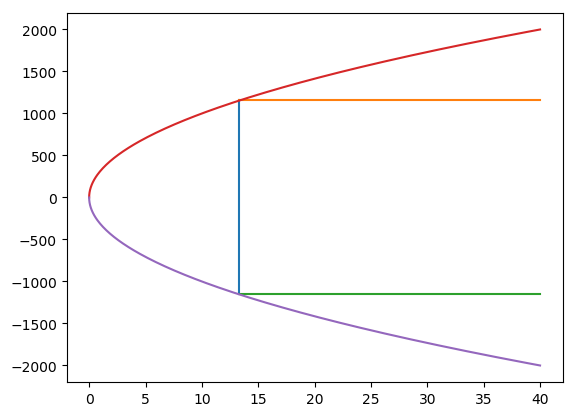

Max -2 x*y + 80 y
Subject to
 -0.1 ω² + x == 0
 y - 100.0 * ω == 0
 0 <= x <= 1.0e6
 0 <= y <= 1.0e6
 ω
Area = 61584.02871356008
energy = 13.33333333333442
power = 1154.7005383792985


2-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001F7CEF28>
 PyObject <matplotlib.lines.Line2D object at 0x000000001F7DA2B0>

In [64]:
using PyCall, PyPlot, JuMP, Ipopt

ω =  collect(0:0.1:20)
k = 0.1
τ = 100

E = k.*ω.^2
Phigh = τ.*ω

model = Model(solver=IpoptSolver(print_level=0))
@variable(model, 0 <= x <= 1e6)
@variable(model, 0 <= y <= 1e6)
@variable(model, ω)
@constraint(model, x == k*ω^2)
@NLconstraint(model, y == τ*ω)
@objective(model, Max, (2y)*(maximum(E)-x))


print(model)

solve(model)

println("Area = ", getobjectivevalue(model))
energy = getvalue(x)
power = getvalue(y)

println("energy = ", energy)
println("power = ", power)

x1 = range(energy, stop=energy, length=10)
y1 = range(-power,stop=power,length=10) 
x2 = range(energy, stop=maximum(E), length=10)
y2 = range(power, stop=power, length=10)
x3 = range(energy, stop=maximum(E), length=10)
y3 = range(-power, stop=-power, length=10)


plot(x1,y1,x2,y2,x3,y3)
plot(E,Phigh,E,-Phigh)


